In [7]:
#
# generating an artificial dataset
#
import math
import pandas as pd
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2OGradientBoostingEstimator



h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 hours 33 mins
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_Gerd_n09qfv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.968 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [8]:
number_of_records = 2000

ids = [x for x in range(0,number_of_records)]
random_category = ['A', 'B', 'C', 'D']
age = [round(random.uniform(18.0, 75.0), 2) for x in range(0, number_of_records)]
healthyEating = [round(x, 0) for x in np.random.normal(loc=5, scale=1.0, size=number_of_records)]
activeLifestyle = [round(x, 0) for x in np.random.normal(loc=5, scale=1.0, size=number_of_records)]

dataframe = pd.DataFrame(ids, columns=['id'])
dataframe['random_category'] = [random_category[random.randint(0,len(random_category)-1)] for x in range(0, len(ids))]
dataframe['age'] = age
dataframe['healthyEating'] = healthyEating
dataframe['activeLifestyle'] = activeLifestyle
dataframe['activeLifestyle'] = np.where(dataframe['age'] < 30, dataframe['activeLifestyle'] + 1 ,  dataframe['activeLifestyle'])
dataframe['income'] = 20000 + ((dataframe['age']*3)**2)
dataframe['income'] = np.where(dataframe['activeLifestyle'] > 5, dataframe['income'] * 0.9, dataframe['income'])
dataframe['income'] = np.where(dataframe['healthyEating'] > 5, dataframe['income'] * 1.1, dataframe['income'])

#
# add noise to the income column
#
dataframe['income'] = dataframe['income'] + random.randint(0,4000)
dataframe['income'] = np.ceil(dataframe['income']/100)*100


(array([356., 323., 275., 228., 212., 186., 158., 138.,  96.,  28.]),
 array([21000., 26700., 32400., 38100., 43800., 49500., 55200., 60900.,
        66600., 72300., 78000.]),
 <BarContainer object of 10 artists>)

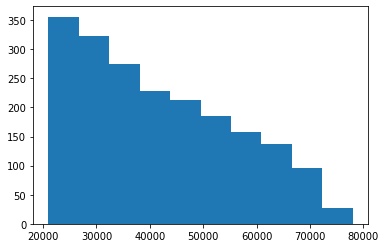

In [9]:
plt.hist(dataframe['income'])

In [10]:
#
# create frames in h2o instance
#
#dataframe = h2o.H2OFrame(dataframe)
#train, validation, test = dataframe.split_frame(ratios=[0.8, 0.1], destination_frames=["train", "validation", "test"], seed=123)

train = h2o.get_frame("train")
validation = h2o.get_frame("validation")
test = h2o.get_frame("test")

In [11]:
y = 'income'
ignoreFields = [y, 'id']
x = [i for i in train.names if i not in ignoreFields]

In [24]:
#
# using a validation frame
#
# model = H2OGradientBoostingEstimator(model_id = "gbm-coursera", ntrees=75, max_depth=5)
# model.train(x, y, train, validation_frame=validation)


#
# using cross validation
#
model = H2OGradientBoostingEstimator(model_id = "gbm-coursera", ntrees=75, nfolds=5, max_depth=5)
model.train(x, y, train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
overfitted_model = H2OGradientBoostingEstimator(model_id = "gbm-coursera-overfitted", ntrees=1000, max_depth=10)
overfitted.train(x, y, train, validation_frame=validation)

In [22]:
#
# Mean Average Error
#
#model.mae(train=True)
model.mae(valid=True)
model.mae(xval=True)

161.02085572406915